<center> # Naiwny klasyfikator bayesowski</center>

Celem ćwiczenia jest zapoznanie się z technikami konstrukcji naiwnego klasywikatora bayesowskiego. 

Ćwiczenie oparte jest o artykuł z [linku](https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python/notebook)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB


Na początku proszę wczytać plik __data.csv__ używając jako separatora ',':

In [2]:
df = pd.read_csv('data.csv', skipinitialspace=True)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


W następnie sprawdź które z kolumn zawierają dane tekstowe lub liczbowe. W tym celu sprawdź wartość  argumentu *dtype* z odpowiednim warunkiem:

In [3]:
categorical = [var for var in df.columns if df[var].dtype == 'O']
print('Dane tektowe zawierają kolumny :\n\n', categorical, '\n')
numerical = [var for var in df.columns if df[var].dtype != 'O']
print('Dane liczbowe zawierają kolumny :\n\n', numerical)

Dane tektowe zawierają kolumny :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income'] 

Dane liczbowe zawierają kolumny :

 ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


Sprawdź czy dane w kolumnach nie zawierają braków a jeżeli tak uzupełnij je według znanych Ci metod:

In [4]:
df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [5]:
for var in categorical:
    print(var, '\n', df[var].unique())

workclass 
 ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education 
 ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
marital_status 
 ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation 
 ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship 
 ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race 
 ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex 
 ['Male' 'Female']
native_country 
 ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'En

In [6]:
for var in categorical:
    df[var].replace('?', np.NaN, inplace=True)

In [7]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

In [8]:
df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

Na przygotowanych danych przeprowadź proces tworzenia zbiorów uczących i testowych, tak by klasyfikator rozpoznawał do której z grup w kolumnie 'income' należy opisywana osoba


In [9]:
X = df.drop(['income'], axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))
        for df2 in [X_train, X_test]:
            df2[col].fillna(X_train[col].mode()[0], inplace=True)

workclass 0.055984555984555984
occupation 0.05607230607230607
native_country 0.018164268164268166


C:\Users\wwier\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [10]:
X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [11]:
X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

Przy pomocy biblioteki [category_encoders](https://contrib.scikit-learn.org/category_encoders/) przeprowadź proces kodowania zmiennych tektowych z pozostałych kategorii na wartości liczbowe:

In [12]:
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship',
                                 'race', 'sex', 'native_country'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
32098,45,1,0,0,0,0,0,0,0,170871,...,0,0,0,0,0,0,0,0,0,0
25206,47,0,1,0,0,0,0,0,0,108890,...,0,0,0,0,0,0,0,0,0,0
23491,48,1,0,0,0,0,0,0,0,187505,...,0,0,0,0,0,0,0,0,0,0
12367,29,1,0,0,0,0,0,0,0,145592,...,0,0,0,0,0,0,0,0,0,0
7054,23,1,0,0,0,0,0,0,0,203003,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
22278,27,1,0,0,0,0,0,0,0,177119,...,0,0,0,0,0,0,0,0,0,0
8950,27,1,0,0,0,0,0,0,0,216481,...,0,0,0,0,0,0,0,0,0,0
7838,25,1,0,0,0,0,0,0,0,256263,...,0,0,0,0,0,0,0,0,0,0
16505,46,1,0,0,0,0,0,0,0,147640,...,0,0,0,0,0,0,0,0,0,0
19140,45,1,0,0,0,0,0,0,0,172822,...,0,0,0,0,0,0,0,0,0,0


In [14]:
from sklearn.preprocessing import RobustScaler
cols = X_train.columns
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.058906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.50,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.578076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.270650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Używając [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) przeprowadź klasyfikację daych ze zbiorów testowych i treningowych. Podaj dokładnosć modelu i macierz błędu wraz z jej wykresem i interpretacją.

In [15]:
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
y_pred

array(['<=50K', '<=50K', '>50K', ..., '>50K', '<=50K', '<=50K'],
      dtype='<U5')

In [16]:
y_test.value_counts()

<=50K    7407
>50K     2362
Name: income, dtype: int64

In [17]:
null_hypothesis = 7407 / y_test.value_counts().sum()
print('Dokładność modelu dla danych treningowych: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Dokładność modelu dla danych testowych: {:.4f}'.format(gnb.score(X_test, y_test)))
print('Dokładność hipotezy zerowej: {0:0.4f}'. format(null_hypothesis))

Dokładność modelu dla danych treningowych: 0.8067
Dokładność modelu dla danych testowych: 0.8083
Dokładność hipotezy zerowej: 0.7582


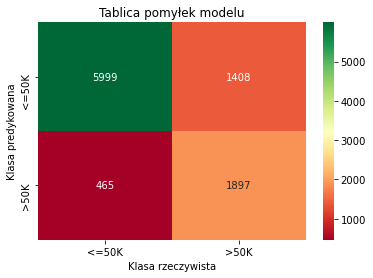

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=y_test.value_counts().index)
cm_matrix = pd.DataFrame(data=cm, columns=y_test.value_counts().index,
                                 index=y_test.value_counts().index)
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='RdYlGn')
plt.title('Tablica pomyłek modelu')
plt.xlabel('Klasa rzeczywista')
plt.ylabel('Klasa predykowana')
plt.show()

Przprowadź uczenie klasyfikatora dla kolumn *race* i *native_country*. Podaj dokładnosć modeli i macierze błędu wraz z ich wykresami i interpretacją. Przedstaw wnioski od czego zależą otrzymane wyniki

In [19]:
#dla kolumny race
X = df.drop(['race'], axis=1)
Y = df['race']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

categorical = [column for column in X_train.columns if X_train[column].dtypes == object]

for column in categorical:
    if X_train[column].isnull().mean() > 0:
        for data_frame in [X_train, X_test]:
            data_frame[column].fillna(X_train[column].mode()[0], inplace=True)

for data_frame in [Y_train, Y_test]:
    data_frame.fillna(Y_train.mode()[0], inplace=True)

C:\Users\wwier\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [20]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'sex', 'native_country', 'income'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,income_1,income_2
32098,45,1,0,0,0,0,0,0,0,170871,...,0,0,0,0,0,0,0,0,1,0
25206,47,0,1,0,0,0,0,0,0,108890,...,0,0,0,0,0,0,0,0,0,1
23491,48,1,0,0,0,0,0,0,0,187505,...,0,0,0,0,0,0,0,0,1,0
12367,29,1,0,0,0,0,0,0,0,145592,...,0,0,0,0,0,0,0,0,0,1
7054,23,1,0,0,0,0,0,0,0,203003,...,0,0,0,0,0,0,0,0,0,1


In [21]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,income_1,income_2
22278,27,1,0,0,0,0,0,0,0,177119,...,0,0,0,0,0,0,0,0,0,1
8950,27,1,0,0,0,0,0,0,0,216481,...,0,0,0,0,0,0,0,0,0,1
7838,25,1,0,0,0,0,0,0,0,256263,...,0,0,0,0,0,0,0,0,0,1
16505,46,1,0,0,0,0,0,0,0,147640,...,0,0,0,0,0,0,0,0,0,1
19140,45,1,0,0,0,0,0,0,0,172822,...,0,0,0,0,0,0,0,0,1,0


In [22]:
columns = X_train.columns
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[columns])
X_test = pd.DataFrame(X_test, columns=[columns])
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41,income_1,income_2
0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.058906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0
1,0.50,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.578076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0
3,-0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.270650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)
Y_pred

array(['Black', 'White', 'White', ..., 'White', 'White', 'Black'],
      dtype='<U18')

In [24]:
Y_test.value_counts()

White                 8388
Black                  911
Asian-Pac-Islander     318
Amer-Indian-Eskimo      80
Other                   72
Name: race, dtype: int64

In [25]:
null_hypothesis = 8388 / Y_test.value_counts().sum()

print('Dokładność modelu dla danych treningowych {:.4f}'.format(gnb.score(X_train, Y_train)))
print('Dokładność modelu dla danych testowych: {:.4f}'.format(gnb.score(X_test, Y_test)))
print('Dokładność hipotezy zerowej: {0:0.4f}'.format(null_hypothesis))

Dokładność modelu dla danych treningowych 0.6763
Dokładność modelu dla danych testowych: 0.6721
Dokładność hipotezy zerowej: 0.8586


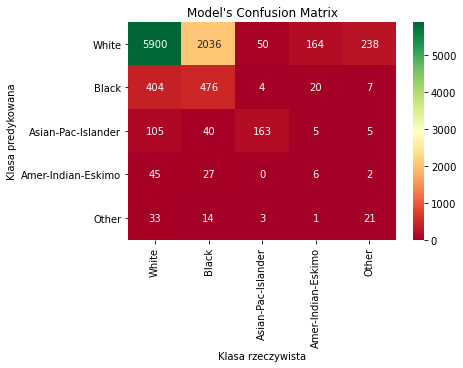

In [26]:
confusion_matrix_df = confusion_matrix(Y_test, Y_pred, labels=Y_test.value_counts().index)
confusion_matrix_df = pd.DataFrame(data=confusion_matrix_df, columns=Y_test.value_counts().index,
                                 index=Y_test.value_counts().index)
sns.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='RdYlGn')
plt.title("Model's Confusion Matrix")
plt.xlabel('Klasa rzeczywista')
plt.ylabel('Klasa predykowana')
plt.show()

In [27]:
#dla kolumny native_country
X = df.drop(['native_country'], axis=1)
Y = df['native_country']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

categorical = [column for column in X_train.columns if X_train[column].dtypes == object]

for column in categorical:
    if X_train[column].isnull().mean() > 0:
        for data_frame in [X_train, X_test]:
            data_frame[column].fillna(X_train[column].mode()[0], inplace=True)

for data_frame in [Y_train, Y_test]:
    data_frame.fillna(Y_train.mode()[0], inplace=True)

C:\Users\wwier\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [28]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship',
                                 'race', 'sex', 'income'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,race_3,race_4,race_5,sex_1,sex_2,capital_gain,capital_loss,hours_per_week,income_1,income_2
32098,45,1,0,0,0,0,0,0,0,170871,...,0,0,0,1,0,7298,0,60,1,0
25206,47,0,1,0,0,0,0,0,0,108890,...,0,0,0,0,1,1831,0,38,0,1
23491,48,1,0,0,0,0,0,0,0,187505,...,0,0,0,1,0,0,0,50,1,0
12367,29,1,0,0,0,0,0,0,0,145592,...,0,0,0,1,0,0,0,40,0,1
7054,23,1,0,0,0,0,0,0,0,203003,...,0,0,0,1,0,0,0,25,0,1


In [29]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,race_3,race_4,race_5,sex_1,sex_2,capital_gain,capital_loss,hours_per_week,income_1,income_2
22278,27,1,0,0,0,0,0,0,0,177119,...,0,0,0,0,1,0,0,44,0,1
8950,27,1,0,0,0,0,0,0,0,216481,...,0,0,0,0,1,0,0,40,0,1
7838,25,1,0,0,0,0,0,0,0,256263,...,0,0,0,1,0,0,0,40,0,1
16505,46,1,0,0,0,0,0,0,0,147640,...,0,1,0,1,0,0,1902,40,0,1
19140,45,1,0,0,0,0,0,0,0,172822,...,0,0,0,1,0,0,2824,76,1,0


In [30]:
columns = X_train.columns
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[columns])
X_test = pd.DataFrame(X_test, columns=[columns])
X_train.head()


,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,race_3,race_4,race_5,sex_1,sex_2,capital_gain,capital_loss,hours_per_week,income_1,income_2
0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.058906,...,0.0,0.0,0.0,0.0,0.0,7298.0,0.0,4.0,1.0,-1.0
1,0.50,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.578076,...,0.0,0.0,0.0,-1.0,1.0,1831.0,0.0,-0.4,0.0,0.0
2,0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,-1.0
3,-0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.270650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,0.0,0.0


In [31]:
# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)
Y_pred

array(['Outlying-US(Guam-USVI-etc)', 'Outlying-US(Guam-USVI-etc)',
       'Yugoslavia', ..., 'Japan', 'Yugoslavia', 'Scotland'], dtype='<U26')

In [32]:
Y_test.value_counts()

United-States                 8892
Mexico                         208
Philippines                     73
Germany                         49
Canada                          37
El-Salvador                     37
India                           31
Puerto-Rico                     30
England                         29
Vietnam                         27
Jamaica                         26
Italy                           25
Cuba                            25
Dominican-Republic              23
South                           22
Poland                          22
Japan                           19
China                           17
Guatemala                       16
Taiwan                          13
Iran                            13
Columbia                        13
Nicaragua                       12
Haiti                           12
Greece                          10
Hong                             9
France                           9
Laos                             8
Portugal            

In [33]:
null_hypothesis = 8892 / Y_test.value_counts().sum()

print('Dokładność modelu dla danych treningowych {:.4f}'.format(gnb.score(X_train, Y_train)))
print('Dokładność modelu dla danych testowych: {:.4f}'.format(gnb.score(X_test, Y_test)))
print('Dokładność hipotezy zerowej: {0:0.4f}'.format(null_hypothesis))

Dokładność modelu dla danych treningowych 0.0129
Dokładność modelu dla danych testowych: 0.0087
Dokładność hipotezy zerowej: 0.9102


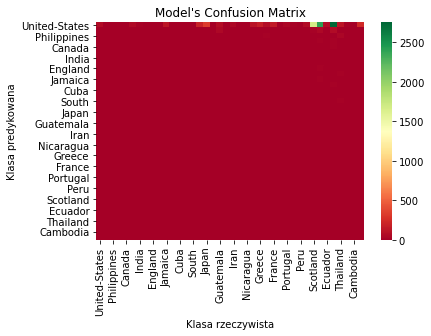

In [34]:
confusion_matrix_df = confusion_matrix(Y_test, Y_pred, labels=Y_test.value_counts().index)
confusion_matrix_df = pd.DataFrame(data=confusion_matrix_df, columns=Y_test.value_counts().index,
                                 index=Y_test.value_counts().index)
sns.heatmap(confusion_matrix_df, annot=False, fmt='d', cmap='RdYlGn')
plt.title("Model's Confusion Matrix")
plt.xlabel('Klasa rzeczywista')
plt.ylabel('Klasa predykowana')
plt.show()

**Wnioski**

Dla pierwszego klasyfikatora odpowiadającemu określeniu przychodu dokładność zarówno dla danych testowych, jak i treningowych jest na poziomie 80%, a dokładność hipotezy zerowej na poziomie 75%. Na podstawie tych wartości można powiedzieć, że klasyfikator spisuje się bardzo dobrze podczas przewidywania czy osoba zawarta w tabeli zarabia powyżej, czy poniżej 50 tysięcy dolarów rocznie.

Dla drugiego klasyfikatora, który odpowiada za rozpoznawania dokładności człowieka uzyskaliśmy już mniejszą dokładność na poziomie 67%, gdzie wartość hipotezy zerowej wynosi 85%. Więc większą skuteczność uzyskalibyśmy, gdyby założyć, że wszystkie osoby ze zbioru testowego są białe.

Ostatni klasyfikator zwraca najgorsze wyniki. Cechuje się dokładnością około 1% poprawnych predykcji. Nie zwraca on poprawncyh predykcji pochodzenia ze Stanów Zjednoczonych, która jest największą grupą wśród badanych. Klasyfikator ten całkowicie nie nadaje się do jakiegokolwiek użytku.

Klasyfikator bayes'a charakteryzuje się prostą konstrukcją i prostym algorytmem. Jeżeli jest spełnione założenie warunkowej niezależności to ten klasyfikator działa szybciej i lepiej niż inne metody.